In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [2]:
col_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red_wine_data = pd.read_csv('winequality-red.csv', names=col_names,delimiter=";")
#white_wine_data = pd.read_csv('winequality-white.csv', names=col_names,delimiter=";")

In [3]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.info()
print "So the datatypes are ", list(set(red_wine_data.dtypes.tolist()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
So the datatypes are  [dtype('int64'), dtype('float64')]


# Class dominance
We can see that number of classes are not balanced. This will adversely affect the prediction.

In [5]:
red_wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Features description
From the above values we can see that there are no null values at all in the data, and also the features are continous and numeric.

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


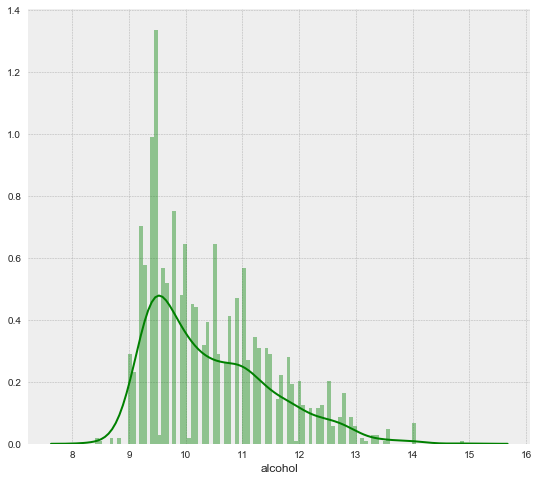

In [6]:
print(red_wine_data['alcohol'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(red_wine_data['alcohol'], color='g', bins=100, hist_kws={'alpha': 0.4});

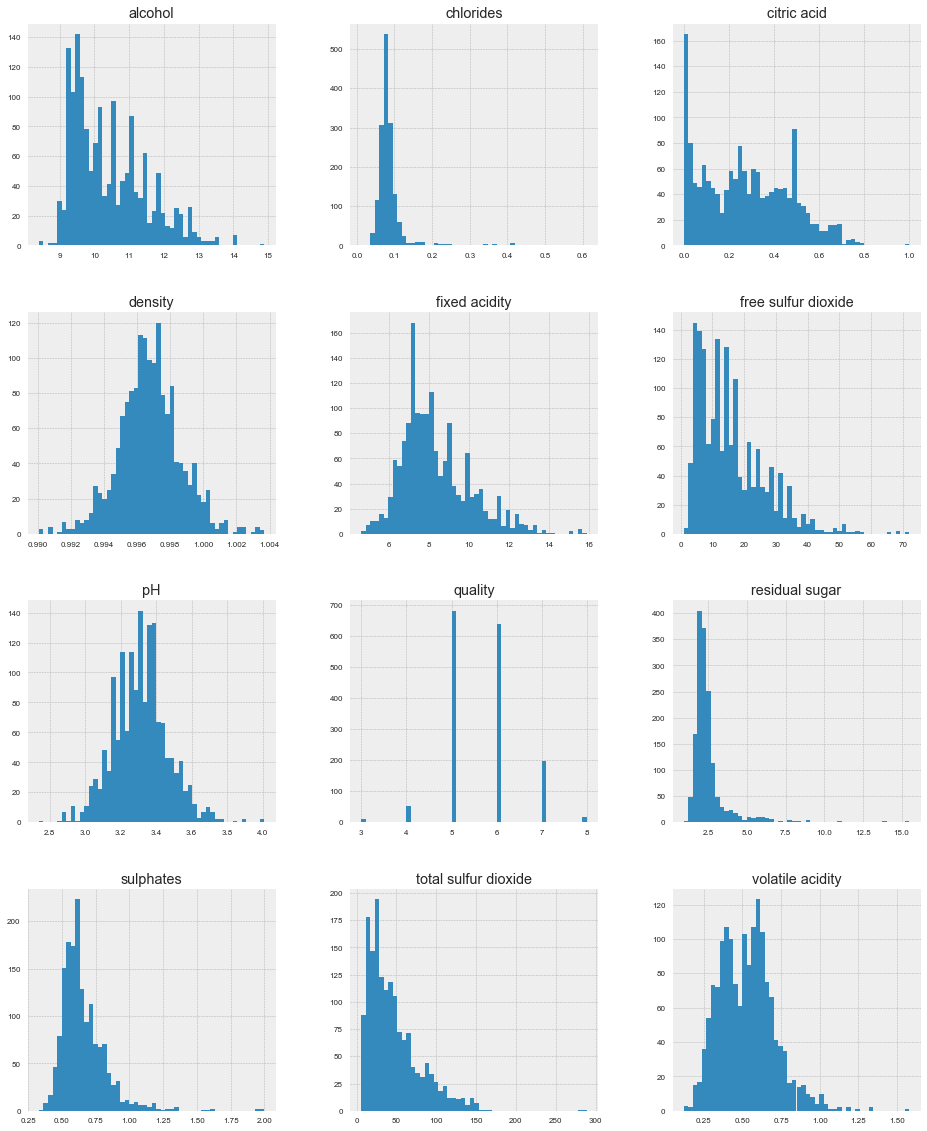

In [7]:
red_wine_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Correlations
Lets check the correlation of features with alcohol

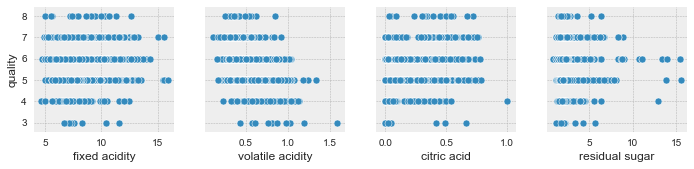

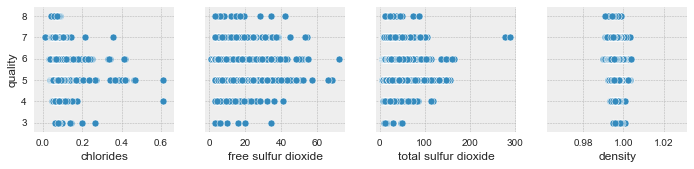

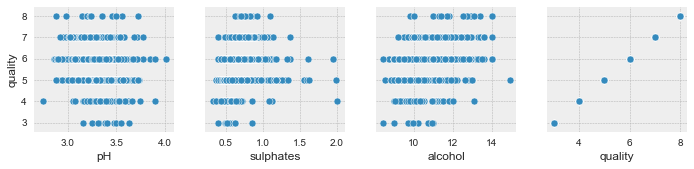

In [9]:
for i in range(0, len(red_wine_data.columns), 4):
    sns.pairplot(data=red_wine_data,
                x_vars=red_wine_data.columns[i:i+4],
                y_vars=['quality'])

# Importance of features

In [14]:
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

np_data1 = red_wine_data.as_matrix()
normalized_np_data1 = preprocessing.scale(np_data1[:,:10])

x_train1, x_test1, y_train1, y_test1 = train_test_split( normalized_np_data1 , np_data1[:,-1] , test_size=0.20)

clf = ensemble.RandomForestClassifier( n_estimators=10 , max_features='auto',max_depth=20)
clf = clf.fit(x_train1, y_train1)
clf.feature_importances_


array([ 0.08323169,  0.11700607,  0.07812562,  0.09071801,  0.09929128,
        0.06784721,  0.12082852,  0.12143047,  0.08476378,  0.13675736])

In [15]:
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), col_names), 
             reverse=True)

[(0.1368, 'sulphates'), (0.1214, 'density'), (0.1208, 'total sulfur dioxide'), (0.117, 'volatile acidity'), (0.0993, 'chlorides'), (0.0907, 'residual sugar'), (0.0848, 'pH'), (0.0832, 'fixed acidity'), (0.0781, 'citric acid'), (0.0678, 'free sulfur dioxide')]
